C:\Users\Stefan\AppData\Local\Temp\ipykernel_23076\508618266.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  clean_data = data.fillna(method='ffill')


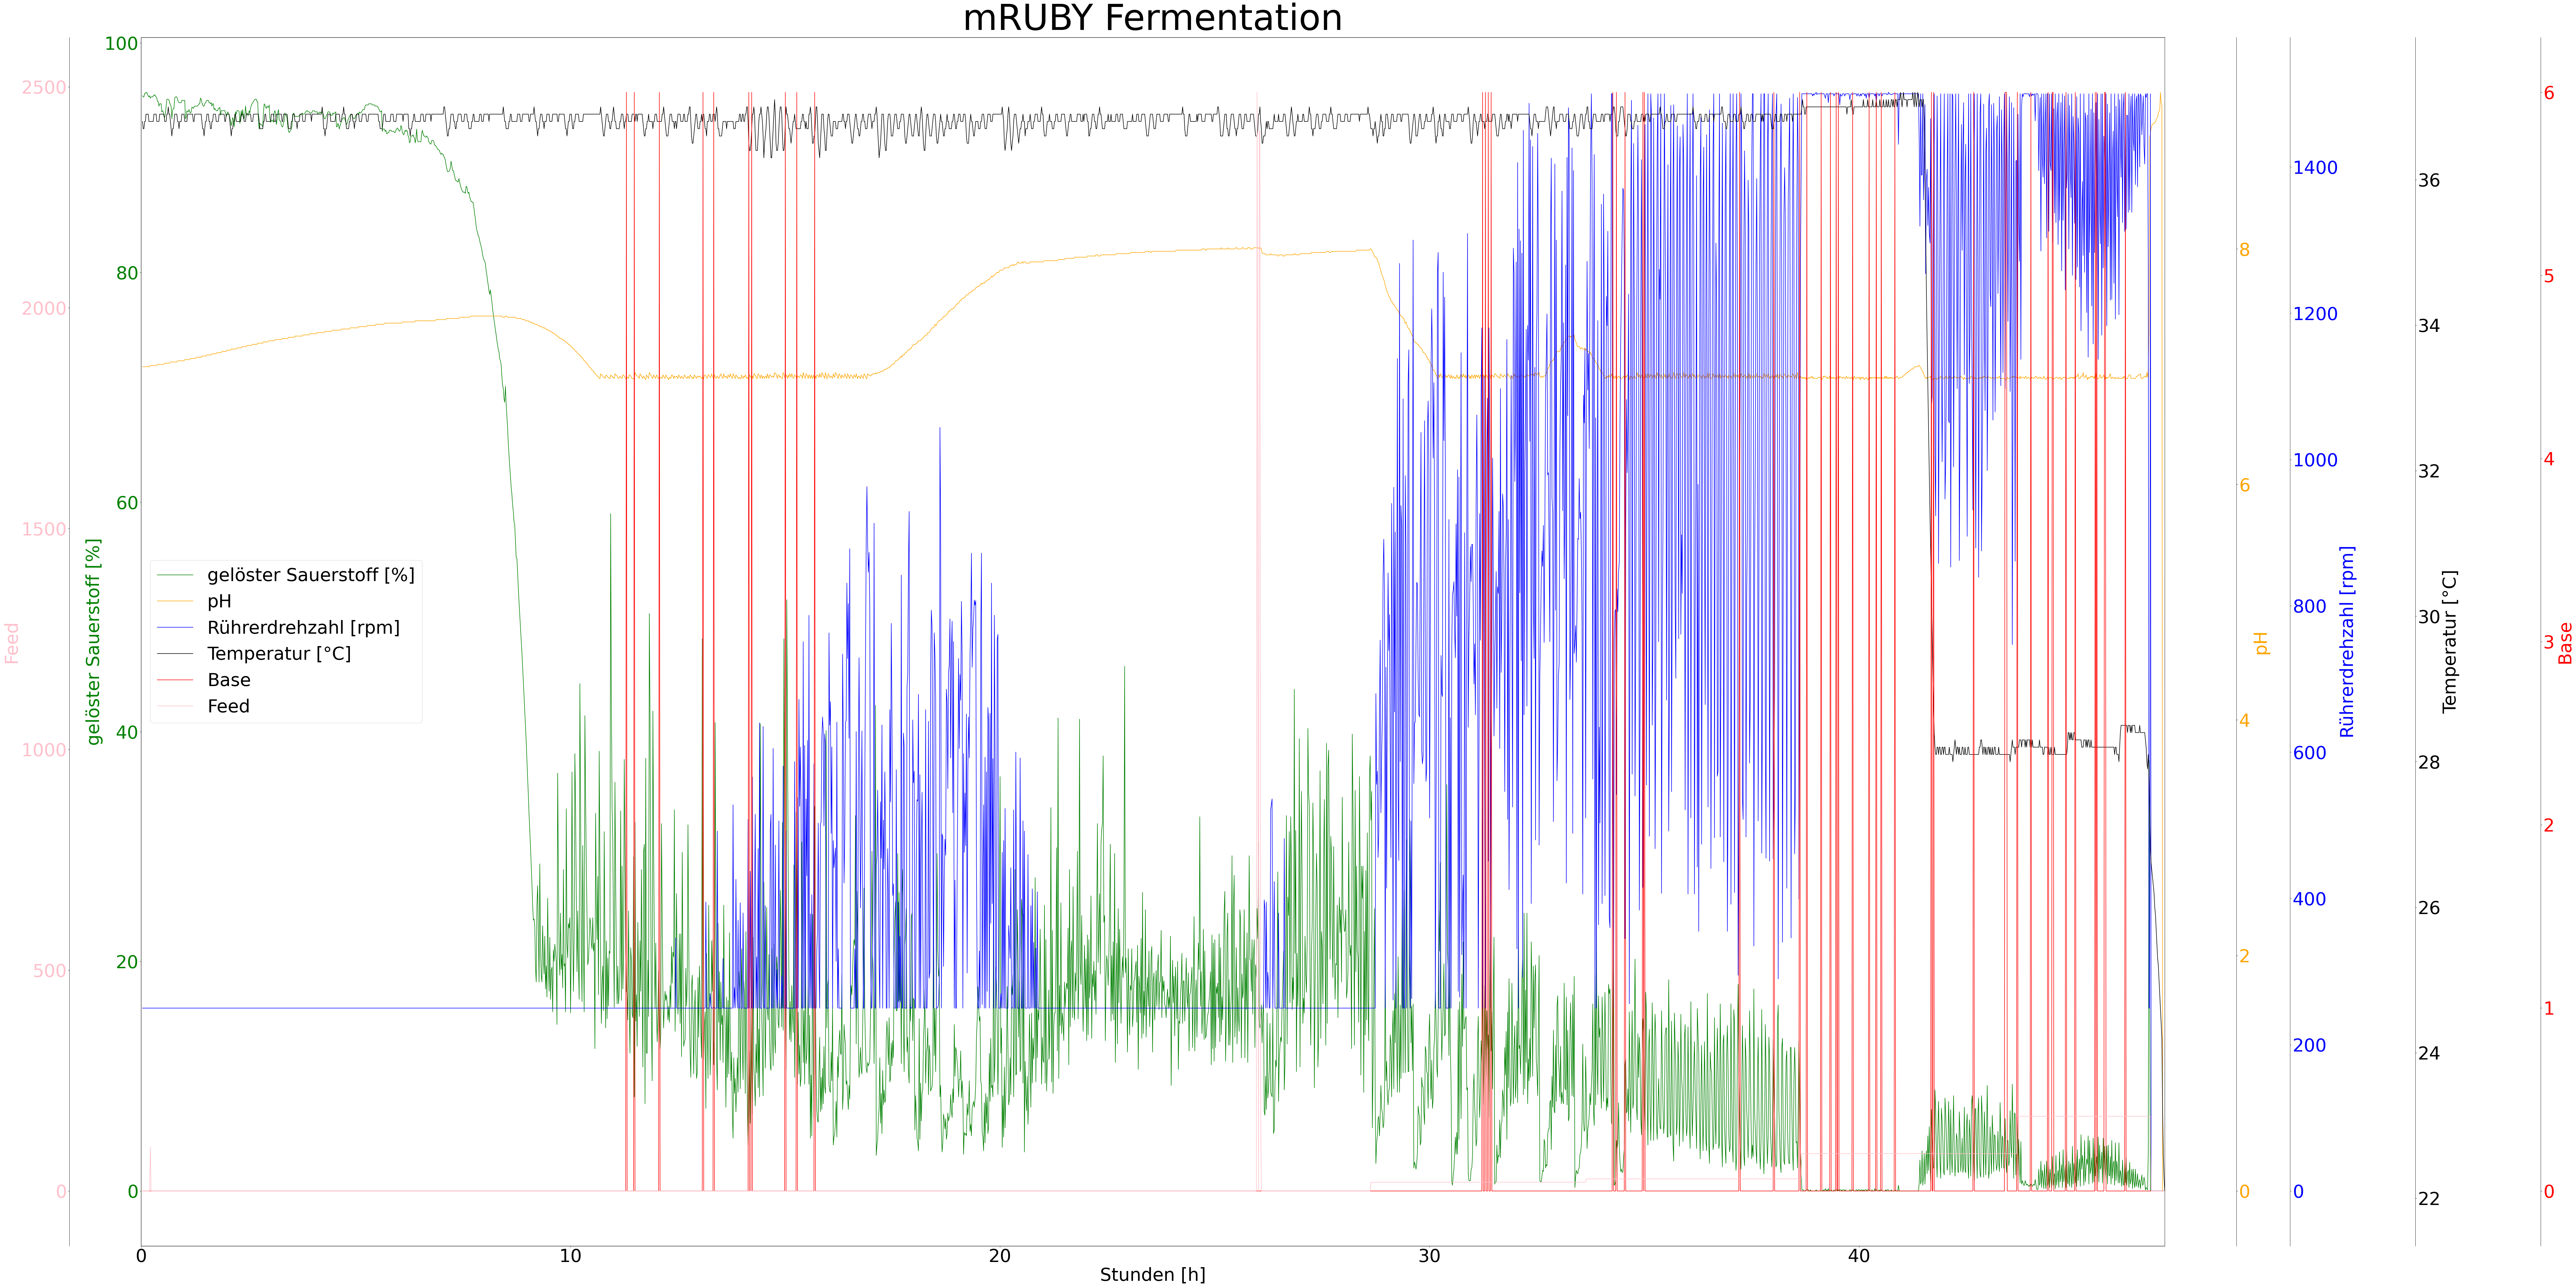

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Pfad zur Excel-Datei (Musst du noch anpassen)
excel_file = "C:/Users/Stefan/Downloads/mRUBY-Ferm_wichtige Daten.xlsx"
# excel_file = "C:/Users/Stefan/Downloads/YFP-Ferm_wichtige Daten.xlsx"
#excel_file = "C:/Users/Stefan/Downloads/BFP-Ferm_wichtige Daten.xlsx"

# Daten laden
data = pd.read_excel(excel_file, skiprows=1)

# Spaltennamen setzen
data.columns = ["Stunden", "gelöster Sauerstoff [%]", "pH", "Rührerdrehzahl [rpm]", "Temperatur [°C]", "Base", "Feed", "HÄÄÄ"]

max_stunden = data["Stunden"].max()

# NA-Werte durch den vorherigen Wert in der gleichen Spalte ersetzen
clean_data = data.fillna(method='ffill')

# Farben für die verschiedenen Variablen
colors = ["green", "orange", "blue", "black", "red", "pink"]

# Erstellen des Basisplots mit angepasster Größe
fig, ax1 = plt.subplots(figsize=(100, 50))  # Hier kannst du die Größe anpassen

# Primäre y-Achse
ax1.plot(clean_data["Stunden"], clean_data["gelöster Sauerstoff [%]"], label="gelöster Sauerstoff [%]", color=colors[0])
ax1.set_ylabel("gelöster Sauerstoff [%]", color=colors[0], fontsize=50)
ax1.tick_params(axis='y', labelcolor=colors[0], labelsize=50)
ax1.grid(False)  # Raster entfernen

# Sekundäre y-Achse
ax2 = ax1.twinx()
ax2.plot(clean_data["Stunden"], clean_data["pH"], label="pH", color=colors[1])
ax2.set_ylabel("pH", color=colors[1], fontsize=50)
ax2.tick_params(axis='y', labelcolor=colors[1], labelsize=50)
ax2.spines['right'].set_position(('outward', 200))  # Angepasste Position der zweiten y-Achse
ax2.grid(False)  # Raster entfernen

# Zusätzliche y-Achsen erstellen
axes = [ax1, ax2]

# Zusätzliche y-Achsen auf der rechten Seite
for i, column in enumerate(["Rührerdrehzahl [rpm]", "Temperatur [°C]", "Base"], start=2):
    ax_new = ax1.twinx()
    ax_new.spines["right"].set_position(('outward', 350 * (i - 1)))  # Position der neuen Achse anpassen
    ax_new.plot(clean_data["Stunden"], clean_data[column], label=column, color=colors[i])
    ax_new.set_ylabel(column, color=colors[i], fontsize=50)  # Hier kannst du die Größe anpassen
    ax_new.tick_params(axis='y', labelcolor=colors[i], labelsize=50)  # Hier kannst du die Größe anpassen
    ax_new.grid(False)  # Raster entfernen
    axes.append(ax_new)

# Zusätzliche y-Achsen auf der linken Seite
for i, column in enumerate(["Feed"], start=5):  # Nur eine y-Achse auf der linken Seite
    ax_new = ax1.twinx()
    ax_new.spines["left"].set_position(('outward', 200 * (i - 4)))  # Position der neuen Achse anpassen
    ax_new.plot(clean_data["Stunden"], clean_data[column], label=column, color=colors[i])
    ax_new.set_ylabel(column, color=colors[i], fontsize=50)  # Hier kannst du die Größe anpassen
    ax_new.tick_params(axis='y', labelcolor=colors[i], labelsize=50)  # Hier kannst du die Größe anpassen
    ax_new.yaxis.set_label_position("left")
    ax_new.yaxis.set_ticks_position("left")
    ax_new.grid(False)  # Raster entfernen
    axes.append(ax_new)

# x-Achse setzen
ax1.set_xlabel('Stunden [h]', fontsize=50)
ax1.set_xlim([0, data["Stunden"].max()])
ax1.tick_params(axis='x', labelsize=50)

# Titel setzen
plt.title('mRUBY Fermentation', fontsize=100)
# plt.title('mYFP Fermentation', fontsize=100)
# plt.title('mBFP Fermentation', fontsize=100)

# Layout anpassen, um Überlappungen zu vermeiden
fig.tight_layout()

# Legenden anpassen
lines, labels = [], []
for ax in axes:
    ax_line, ax_label = ax.get_legend_handles_labels()
    lines.extend(ax_line)
    labels.extend(ax_label)

ax1.legend(lines, labels, loc='center left', fontsize=50)

# Grafik speichern mit hoher Auflösung
plt.savefig('high_res_plot.png', dpi=250, bbox_inches='tight')  # Hohe DPI und Layout anpassen

# Grafik anzeigen
plt.show()
